In [76]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
brands_df = pd.read_json('brands.json.gz', lines= True)
receipts_df = pd.read_json('receipts.json.gz', lines= True)
user_df = pd.read_json('users.json/users.json', lines= True)

In [46]:
def dataset_summary(df, name):
    print(f"=== {name} Dataset Summary ===")
    print(f"Shape: {df.shape}")
    print("\nColumn non-null counts:")
    for col in df.columns:
        print(f"- {col}: {df[col].count()} non-null values ({df[col].count()/len(df)*100:.1f}%)")
    print("\nDtypes:")
    print(df.dtypes)
    print("\n")


In [47]:
dataset_summary(brands_df, "Brands")

=== Brands Dataset Summary ===
Shape: (1167, 8)

Column non-null counts:
- _id: 1167 non-null values (100.0%)
- barcode: 1167 non-null values (100.0%)
- category: 1012 non-null values (86.7%)
- categoryCode: 517 non-null values (44.3%)
- cpg: 1167 non-null values (100.0%)
- name: 1167 non-null values (100.0%)
- topBrand: 555 non-null values (47.6%)
- brandCode: 933 non-null values (79.9%)

Dtypes:
_id              object
barcode           int64
category         object
categoryCode     object
cpg              object
name             object
topBrand        float64
brandCode        object
dtype: object




## Brands Dataset

**Overview:** A collection of 1,167 product brands with their attributes and categorization.

**Key Characteristics:**
- Complete data for brand identifiers, barcodes, and names
- Nested JSON structure for CPG (Consumer Packaged Goods) company information
- Significant missing data in categoryCode (55.7%) and topBrand (52.4%) fields
- Moderate missing data in category (13.3%) and brandCode (20.1%) fields

**Data Types:**
- Mostly text-based fields stored as objects
- Barcode stored as integer
- topBrand stored as float (appears to be a binary flag or rating)

**Notable Issues:**
- Inconsistent category and categoryCode mapping
- Missing topBrand values for over half the brands
- brandCode missing for about 20% of entries

In [48]:
dataset_summary(receipts_df, "Receipts")

=== Receipts Dataset Summary ===
Shape: (1119, 15)

Column non-null counts:
- _id: 1119 non-null values (100.0%)
- bonusPointsEarned: 544 non-null values (48.6%)
- bonusPointsEarnedReason: 544 non-null values (48.6%)
- createDate: 1119 non-null values (100.0%)
- dateScanned: 1119 non-null values (100.0%)
- finishedDate: 568 non-null values (50.8%)
- modifyDate: 1119 non-null values (100.0%)
- pointsAwardedDate: 537 non-null values (48.0%)
- pointsEarned: 609 non-null values (54.4%)
- purchaseDate: 671 non-null values (60.0%)
- purchasedItemCount: 635 non-null values (56.7%)
- rewardsReceiptItemList: 679 non-null values (60.7%)
- rewardsReceiptStatus: 1119 non-null values (100.0%)
- totalSpent: 684 non-null values (61.1%)
- userId: 1119 non-null values (100.0%)

Dtypes:
_id                         object
bonusPointsEarned          float64
bonusPointsEarnedReason     object
createDate                  object
dateScanned                 object
finishedDate                object
modifyDate

## Receipts Dataset

**Overview:** Contains 1,119 receipt transactions with detailed information about purchases, points earned, and processing status.

**Key Characteristics:**
- Core receipt identifiers and timestamps (ID, createDate, dateScanned, modifyDate) are complete
- Significant missing data across multiple fields, particularly bonus points information
- Purchase details (totalSpent, purchasedItemCount) missing for ~40% of receipts
- Nested structure for receipt items (rewardsReceiptItemList)

**Data Types:**
- Dates stored as object type with nested JSON structure
- Numeric values (points, counts, amounts) stored as float64
- Receipt status and user reference stored as objects

**Notable Issues:**
- High percentage of missing values across multiple fields
- Non-standardized date formats stored as objects
- Receipt items stored as nested arrays requiring flattening

In [49]:
dataset_summary(user_df, "Users")

=== Users Dataset Summary ===
Shape: (495, 7)

Column non-null counts:
- _id: 495 non-null values (100.0%)
- active: 495 non-null values (100.0%)
- createdDate: 495 non-null values (100.0%)
- lastLogin: 433 non-null values (87.5%)
- role: 495 non-null values (100.0%)
- signUpSource: 447 non-null values (90.3%)
- state: 439 non-null values (88.7%)

Dtypes:
_id             object
active            bool
createdDate     object
lastLogin       object
role            object
signUpSource    object
state           object
dtype: object




## Users Dataset

**Overview:** Contains information about 495 users of the rewards platform.

**Key Characteristics:**
- Complete data for core user attributes (ID, active status, created date, role)
- High completion rate for login information (87.5%) and geographical data (88.7%)
- Sign-up source available for 90.3% of users

**Data Types:**
- Boolean flag for active status
- Dates stored as objects with nested structure
- Text fields (role, state, signUpSource) stored as objects

**Notable Issues:**
- Appears to have duplicate user IDs in the dataset
- Dates stored in non-standard format
- Some missing geographical and source information

In [50]:
receipts_df = pd.read_json('receipts.json.gz', lines=True)
receipts_df.head(5)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [51]:
receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

In [52]:
user_df = pd.read_json('users.json/users.json', lines = True)
user_df

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


In [53]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


## Users Dataset

**Overview:** Contains information about 495 users of the rewards platform.

**Key Characteristics:**
- Complete data for core user attributes (ID, active status, created date, role)
- High completion rate for login information (87.5%) and geographical data (88.7%)
- Sign-up source available for 90.3% of users

**Data Types:**
- Boolean flag for active status
- Dates stored as objects with nested structure
- Text fields (role, state, signUpSource) stored as objects

**Notable Issues:**
- Appears to have duplicate user IDs in the dataset
- Dates stored in non-standard format
- Some missing geographical and source information

In [ ]:
print(f"Brands duplicates: {brands_df.duplicated('_id').sum()}")
print(f"Receipts duplicates: {receipts_df.duplicated('_id').sum()}")
print(f"Users duplicates: {user_df.duplicated('_id').sum()}")

Brands duplicates: 0
Receipts duplicates: 0
Users duplicates: 283


## Duplicate Records
* **Brands:** No duplicates detected
* **Receipts:** No duplicates detected
* **Users:** 283 duplicate records (57% of dataset)
  * 70 unique user IDs appear multiple times
  * Most duplicated ID appears 20 times

In [56]:
user_count = user_df['_id'].value_counts()
print(f'Users with duplicated IDs: {sum(user_count> 1)}')
if sum(user_count > 1) > 0:
    print("Top duplicate user IDs:")
    print(user_count[user_count > 1].head())


Users with duplicated IDs: 70
Top duplicate user IDs:
_id
{'$oid': '54943462e4b07e684157a532'}    20
{'$oid': '5fc961c3b8cfca11a077dd33'}    20
{'$oid': '5ff5d15aeb7c7d12096d91a2'}    18
{'$oid': '59c124bae4b0299e55b0f330'}    18
{'$oid': '5fa41775898c7a11a6bcef3e'}    18
Name: count, dtype: int64


In [57]:
def check_date_format(df, date_columns):
    for col in date_columns:
        if col in df.columns:
            sample = df[col].dropna().iloc[0] if not df[col].dropna().empty else None
            print(f"- {col} sample: {type(sample)}, value: {sample}")

In [58]:
print("Receipt date fields:")
receipt_date_cols = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']
check_date_format(receipts_df, receipt_date_cols)

Receipt date fields:
- createDate sample: <class 'dict'>, value: {'$date': 1609687531000}
- dateScanned sample: <class 'dict'>, value: {'$date': 1609687531000}
- finishedDate sample: <class 'dict'>, value: {'$date': 1609687531000}
- modifyDate sample: <class 'dict'>, value: {'$date': 1609687536000}
- pointsAwardedDate sample: <class 'dict'>, value: {'$date': 1609687531000}
- purchaseDate sample: <class 'dict'>, value: {'$date': 1609632000000}


## Data Format Issues
* All date fields stored as nested JSON objects: `{'$date': timestamp}`
* Nested structures in CPG field: `{'$id': {'$oid': '...'}, '$ref': 'Cogs'}`
* Receipt items stored as arrays requiring flattening


In [59]:
print("\nUser date fields:")
user_date_cols = ['createdDate', 'lastLogin']
check_date_format(user_df, user_date_cols)


User date fields:
- createdDate sample: <class 'dict'>, value: {'$date': 1609687444800}
- lastLogin sample: <class 'dict'>, value: {'$date': 1609687537858}


In [ ]:
if 'cpg' in brands_df.columns:
    cpg_sample = brands_df['cpg'].dropna().iloc[0] if not brands_df['cpg'].dropna().empty else None
    print(f"CPG sample: {type(cpg_sample)}, value: {cpg_sample}")


CPG sample: <class 'dict'>, value: {'$id': {'$oid': '601ac114be37ce2ead437550'}, '$ref': 'Cogs'}


In [61]:
if 'rewardsReceiptItemList' in receipts_df.columns:
    items_sample = receipts_df['rewardsReceiptItemList'].dropna().iloc[0] if not receipts_df['rewardsReceiptItemList'].dropna().empty else None
    print(f"rewardsReceiptItemList sample: {type(items_sample)}")
    if items_sample:
        print(f"First item in list: {items_sample[0] if isinstance(items_sample, list) and len(items_sample) > 0 else 'Empty'}")


rewardsReceiptItemList sample: <class 'list'>
First item in list: {'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '26.00', 'itemPrice': '26.00', 'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'quantityPurchased': 5, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '26.00', 'userFlaggedQuantity': 5}


In [ ]:
print("\n=== Missing Join Keys ===")
print(f"Missing brandCode in brands: {brands_df['brandCode'].isna().sum()} out of {len(brands_df)} ({brands_df['brandCode'].isna().sum()/len(brands_df)*100:.1f}%)")
print(f"Missing userId in receipts: {receipts_df['userId'].isna().sum()} out of {len(receipts_df)} ({receipts_df['userId'].isna().sum()/len(receipts_df)*100:.1f}%)")



=== Missing Join Keys ===
Missing brandCode in brands: 234 out of 1167 (20.1%)
Missing userId in receipts: 0 out of 1119 (0.0%)


In [68]:
if 'bonusPointsEarned' in receipts_df.columns:
    bonus_stats = receipts_df['bonusPointsEarned'].describe()
    print("Bonus points statistics:")
    print(bonus_stats)

Bonus points statistics:
count    544.000000
mean     238.893382
std      299.091731
min        5.000000
25%        5.000000
50%       45.000000
75%      500.000000
max      750.000000
Name: bonusPointsEarned, dtype: float64


In [ ]:
if 'totalSpent' in receipts_df.columns:
    spent_stats = receipts_df['totalSpent'].describe()
    print("\nTotal spent statistics:")
    print(spent_stats)



Total spent statistics:
count     684.000000
mean       77.796857
std       347.110349
min         0.000000
25%         1.000000
50%        18.200000
75%        34.960000
max      4721.950000
Name: totalSpent, dtype: float64



## Statistical Anomalies
* **Bonus Points:** 
  * Range: 5-750 points
  * Median: 45 points
* **Total Spent:**
  * Range: $0-$4,721.95
  * Median: $18.20
  * Potential outliers in upper quartile

In [ ]:
if 'state' in user_df.columns:
    state_counts = user_df['state'].value_counts()
    print("\nState distribution:")
    print(state_counts.head(10))
    
    if 'state' in user_df.columns:
        invalid_states = [s for s in state_counts.index if s not in ['NaN', 'nan', None] and len(s) != 2]
        if invalid_states:
            print(f"\nPotentially invalid state codes: {invalid_states}")


State distribution:
state
WI    396
NH     20
AL     12
OH      5
IL      3
KY      1
CO      1
SC      1
Name: count, dtype: int64



Receipt status distribution:
rewardsReceiptStatus
FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: count, dtype: int64


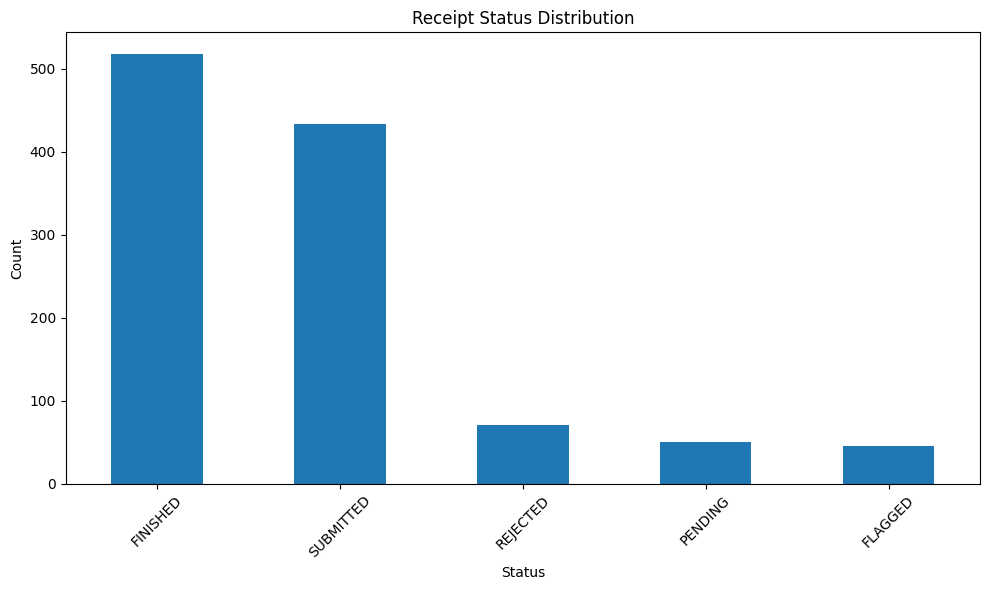

In [ ]:
if 'rewardsReceiptStatus' in receipts_df.columns:
    status_counts = receipts_df['rewardsReceiptStatus'].value_counts()
    print("\nReceipt status distribution:")
    print(status_counts)
    
    plt.figure(figsize=(10, 6))
    status_counts.plot(kind='bar')
    plt.title('Receipt Status Distribution')
    plt.ylabel('Count')
    plt.xlabel('Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('receipt_status_distribution.png')


## Distribution Issues
* Wisconsin (WI) accounts for 90% of users with state data
* Receipt status distribution:
  * 46% FINISHED
  * 39% SUBMITTED
  * 6% REJECTED
  * 9% Other (PENDING, FLAGGED)